In [ ]:
#The aim is to use the feature Relative_compactness to predict cooling_load

In [39]:
#first import all the libraries you are going to use
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [41]:
Data= pd.read_excel('SAMPLE.xlsx')
Data.head()
#The dataset is imported and the observation here is that the columns have no unique name.
#printing out the first 5 observations of the dataset

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [33]:
column_names = {'X1': 'Relative_Compactness','X2': 'Surface_Area', 'X3':'Wall_Area', 'X4': 'Roof_Area', 
      'X5': 'Overall_Height', 'X6': 'Orientation', 'X7': 'Glazing_Area', 'X8': 'Glazing_Area_Distriution',
      'Y1': 'Heating_Load', 'Y2': 'Cooling_Load'}
df =Data.rename(columns=column_names)
df.head()
#The observation here is that columns have been renamed and we can see the first 5 observations of the changes that was made.



,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distriution,Heating_Load,Cooling_Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [37]:
df.isnull()

 #There appears to be no null values

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distriution,Heating_Load,Cooling_Load
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False,False


In [23]:
df.describe() #Giving a stsatistical analysis of the dataset

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distriution,Heating_Load,Cooling_Load
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307195,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090204,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


In [38]:
simple_linear_reg_df = df[['Relative_Compactness', 'Cooling_Load']].sample(30, random_state=2)

print(simple_linear_reg_df)
#Here, a new object called simple_linear_reg_df is created and the focus is on two samples of the dataset(30 rows each)

     Relative_Compactness  Cooling_Load
158                  0.82         25.35
251                  0.86         31.28
631                  0.90         33.31
757                  0.66         17.79
689                  0.79         47.59
573                  0.62         17.21
553                  0.74         17.25
728                  0.86         29.69
183                  0.66         13.83
515                  0.69         14.60
460                  0.71         14.67
143                  0.62         14.24
258                  0.79         43.14
682                  0.86         36.21
62                   0.82         24.61
338                  0.98         30.18
399                  0.82         26.41
68                   0.76         33.87
707                  0.69         17.39
236                  0.62         14.37
744                  0.74         16.69
484                  0.90         32.25
704                  0.69         16.81
99                   0.98         25.89


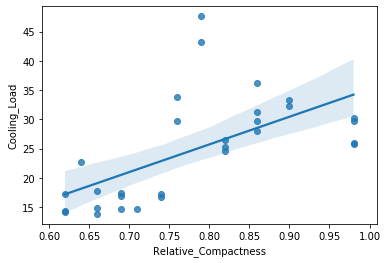

In [42]:
#regression plot
sns.regplot(x="Relative_Compactness", y="Cooling_Load", data= simple_linear_reg_df)

In [45]:
X = simple_linear_reg_df.iloc[:, 0].values
Y = simple_linear_reg_df.iloc[:, 1].values
print(X)
print(Y)
#splitting the 30 samples into X and Y datasets as independent and dependent variables.


[0.82 0.86 0.9  0.66 0.79 0.62 0.74 0.86 0.66 0.69 0.71 0.62 0.79 0.86
 0.82 0.98 0.82 0.76 0.69 0.62 0.74 0.9  0.69 0.98 0.86 0.98 0.66 0.76
 0.64 0.98]
[25.35 31.28 33.31 17.79 47.59 17.21 17.25 29.69 13.83 14.6  14.67 14.24
 43.14 36.21 24.61 30.18 26.41 33.87 17.39 14.37 16.69 32.25 16.81 25.89
 28.02 25.84 14.83 29.79 22.73 29.79]


In [58]:
 X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=1/3, random_state=0)
print(X_train)
print(X_test)
print(Y_train)
print(Y_test)
X_train
X_test
#The visualization of x_train and that of Y_train and test of both dataset can be viewed properly when using Spyder
                                                     

[0.62 0.82 0.66 0.82 0.98 0.74 0.86 0.98 0.74 0.79 0.69 0.62 0.69 0.86
 0.98 0.66 0.82 0.9  0.98 0.79]
[0.9  0.64 0.86 0.71 0.66 0.86 0.76 0.62 0.76 0.69]
[17.21 26.41 13.83 24.61 25.89 16.69 31.28 29.79 17.25 47.59 17.39 14.37
 14.6  29.69 25.84 17.79 25.35 32.25 30.18 43.14]
[33.31 22.73 36.21 14.67 14.83 28.02 29.79 14.24 33.87 16.81]


array([0.9 , 0.64, 0.86, 0.71, 0.66, 0.86, 0.76, 0.62, 0.76, 0.69])

In [59]:
#fitiing simple linear regression to training set. This is basically training our machine learning model.
#first import the libraries to be used
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
#convert the data into 2 Dimensional array.
X_train =X_train.reshape(-1, 1)
Y_train =Y_train.reshape(-1, 1)
regressor.fit(X_train,Y_train) #training our machine learning model using these data.




LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#Congratulations, we have trained our ML using that data.

In [61]:
#PREDICTING THE DATASET(TEST RESULTS)
#first we are to reshape the dataset
X_test =X_test.reshape(-1, 1)
y_pred= regressor.predict(X_test)
print(y_pred)


[[29.26864245]
 [18.31967207]
 [27.58418547]
 [21.26747179]
 [19.16190056]
 [27.58418547]
 [23.37304302]
 [17.47744358]
 [23.37304302]
 [20.4252433 ]]


In [62]:
print(Y_test) #comparing the values
print(y_pred)
#we made use of X_test to make predictions for the dependent variable. According to the results, the differnrce is pretty much.

[33.31 22.73 36.21 14.67 14.83 28.02 29.79 14.24 33.87 16.81]
[[29.26864245]
 [18.31967207]
 [27.58418547]
 [21.26747179]
 [19.16190056]
 [27.58418547]
 [23.37304302]
 [17.47744358]
 [23.37304302]
 [20.4252433 ]]


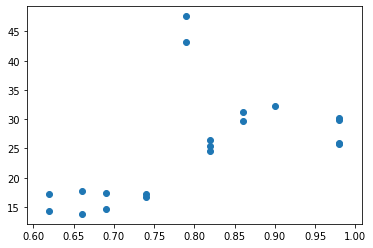

In [63]:
#visualizing the results(training sets).
#we will scatter all the data points across the X and Y axis. These data points are X_train and Y_train
plt.scatter(X_train, Y_train)
#As shown below, these are the data points we used in training the ML model 

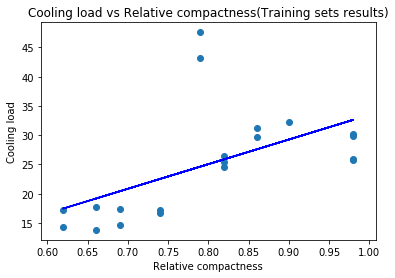

In [65]:
#PLOTTING REGRESSION LINE. The regression line is the best fitting line and the predicted line and to predict this line, 
#we have taking the data points of X_train and the predicted values of X_train.
plt.scatter(X_train, Y_train)
plt.plot(X_train,regressor.predict(X_train), color='BLUE')
plt.title('Cooling load vs Relative compactness(Training sets results)')
plt.xlabel('Relative compactness')
plt.ylabel('Cooling load')
plt.show()
#Observation, if you run this code without plt.sactter(),  your visualization will be limited
#as only the regression line will show making visualization difficult to understand. this is shown below the main figure.

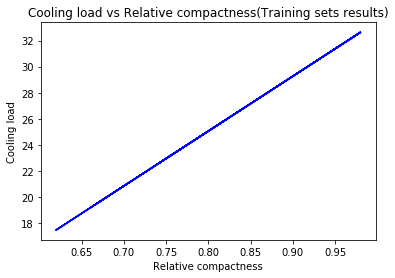

In [66]:
plt.plot(X_train,regressor.predict(X_train), color='BLUE')
plt.title('Cooling load vs Relative compactness(Training sets results)')
plt.xlabel('Relative compactness')
plt.ylabel('Cooling load')
plt.show()

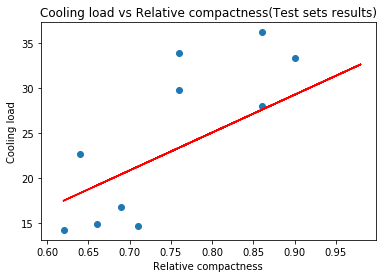

In [67]:
#Visualizing results of test sets
plt.scatter(X_test, Y_test)
plt.plot(X_train,regressor.predict(X_train), color='red') #There is no need to change this.
#This is because this is the best fitting line and we have already trained our machine model. 
plt.title('Cooling load vs Relative compactness(Test sets results)')
plt.xlabel('Relative compactness')
plt.ylabel('Cooling load')
plt.show()
#the regression line tried to fit the data points

In [ ]:
#it should also be noted that the test sets were not used in training the Ml model
#but rather we are visualizing the results  and the best fitting line on the same graph and making comparisons.